In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')



In [80]:
# import dataset

In [81]:
articles_train = pd.read_csv('data/Train.csv')
articles_test = pd.read_csv('data/Test.csv')
articles_test.head()

,ID,Text
0,ID_ADHEtjTi,Abambo odzikhweza akuchuluka Kafukufuku wa ap...
1,ID_AHfJktdQ,Ambuye Ziyaye Ayamikira Aphunzitsi a Tilitonse...
2,ID_AUJIHpZr,Anatcheleza: Akundiopseza a gogo wanga Akundi...
3,ID_AUKYBbIM,Ulova wafika posauzana Adatenga digiri ya uph...
4,ID_AZnsVPEi,"Dzombe kukoma, koma Kuyambira makedzana, pant..."


In [83]:
#preprocessing
#rename columns
articles_train = articles_train.rename(columns={'Label':'Categories','Text':'Headlines'})


In [84]:

def clean_lower(text):
    return str(text).lower()
articles_train['Headlines'] = articles_train['Headlines'].apply(clean_lower)
articles_train['Headlines'].head()

0     mwangonde: khansala wachinyamata akamati achi...
1     mcp siidakhutire ndi kalembera chipani cha ma...
2    bungwe la manepo lapempha boma liganizire anth...
3     ndale zogawanitsa miyambo zanyanya si zachile...
4     nanga wapolisi ataphofomoka? masiku ano sichi...
Name: Headlines, dtype: object

In [85]:
#articles_train = articles_train.rename(columns={'Text':'Headlines'})
news_example = articles_train.iloc[0]
print(f"""
Headline
{news_example['Headlines']}


Category
{news_example['Categories']}

""")


Headline
 mwangonde: khansala wachinyamata akamati achinyamata ndi atsogoleri a mawa, ambiri amaganiza kuti izi ndi nkhambakamwa chabe. koma achinyamata ena, monga lusubilo mwangonde, akukwaniritsa akupherezetsa mawuwa osati pongolota kuti adzakhala, koma kutsogolera kumene chifukwa nthawi yawo yakwana. dailes banda adacheza ndi mwangonde, khansala wachinyama, yemwe akuimira jumbo ward mumzinda wa mzuzu, motere:  chisale watuluka nkumangidwanso  sipakala waimitsa nyumba ya malamulo  pa wenela pasintha zedi ali ndi masomphenya: mwangonde tikudziweni  ndine lusubilo mwangonde, ndili ndi zaka 27 zakubadwa. ndinabadwa mbanja la ana asanu ndipo ndine wachinayi kubadwa. ndimachokera mmudzi mwa mwamalopa, kwa paramount chief kyungu mboma la karonga. sindili pabanja pakadalipano.
 mbiri ya maphunziro anu ndi yotani? maphunziro anga a pulaimale ndidachitira kusukula yapulaiveti ya viphya mumzinda wa mzuzu ndipo asekondale ndidachitira pa phwezi boys mboma la rumphi. ndili ndi diploma ya accoun

In [77]:
# Data Exploration
#articles_train.info()
#no of missong values
articles_train.isna().sum()

ID            0
Headlines     0
Categories    0
dtype: int64


Headline
 mwangonde: khansala wachinyamata akamati achinyamata ndi atsogoleri a mawa, ambiri amaganiza kuti izi ndi nkhambakamwa chabe. koma achinyamata ena, monga lusubilo mwangonde, akukwaniritsa akupherezetsa mawuwa osati pongolota kuti adzakhala, koma kutsogolera kumene chifukwa nthawi yawo yakwana. dailes banda adacheza ndi mwangonde, khansala wachinyama, yemwe akuimira jumbo ward mumzinda wa mzuzu, motere:  chisale watuluka nkumangidwanso  sipakala waimitsa nyumba ya malamulo  pa wenela pasintha zedi ali ndi masomphenya: mwangonde tikudziweni  ndine lusubilo mwangonde, ndili ndi zaka 27 zakubadwa. ndinabadwa mbanja la ana asanu ndipo ndine wachinayi kubadwa. ndimachokera mmudzi mwa mwamalopa, kwa paramount chief kyungu mboma la karonga. sindili pabanja pakadalipano.
 mbiri ya maphunziro anu ndi yotani? maphunziro anga a pulaimale ndidachitira kusukula yapulaiveti ya viphya mumzinda wa mzuzu ndipo asekondale ndidachitira pa phwezi boys mboma la rumphi. ndili ndi diploma ya accoun

In [43]:
articles_train = articles_train[['Categories', 'Headlines']]
data_type = articles_train.groupby('Categories').count()['Headlines'].reset_index()
data_type


,Categories,Headlines
0,ARTS AND CRAFTS,7
1,CULTURE,23
2,ECONOMY,86
3,EDUCATION,43
4,FARMING,78
5,FLOODING,7
6,HEALTH,127
7,LAW/ORDER,136
8,LOCALCHIEFS,25
9,MUSIC,15


In [48]:
# map category to target 
mapper = {}

for i , category in enumerate(articles_train["Categories"].unique()):
    mapper[category] = i

articles_train["category_target"] = articles_train['Categories'].map(mapper)
articles_train.head()

,Categories,Headlines,category_target
0,POLITICS,Mwangonde: Khansala wachinyamata Akamati achi...,0
1,POLITICS,MCP siidakhutire ndi kalembera Chipani cha Ma...,0
2,HEALTH,Bungwe la MANEPO Lapempha Boma Liganizire Anth...,1
3,POLITICS,Ndale zogawanitsa miyambo zanyanya Si zachile...,0
4,LAW/ORDER,Nanga wapolisi ataphofomoka? Masiku ano sichi...,2


<AxesSubplot:title={'center':'headlines based on category'}>

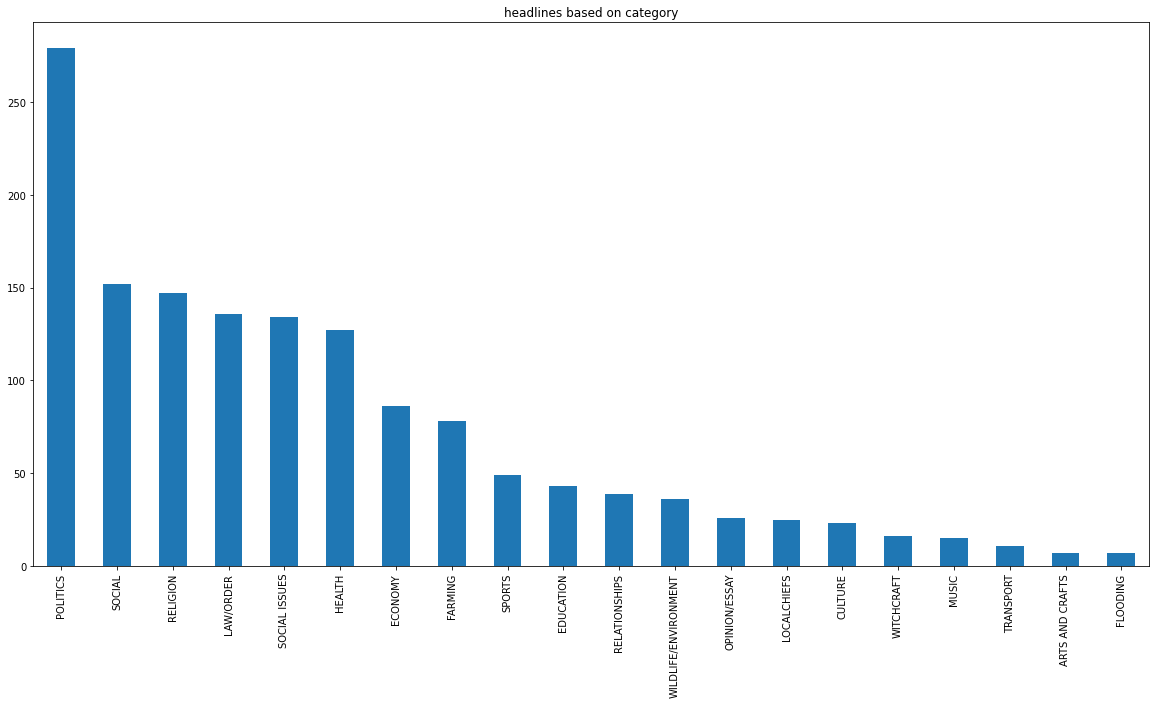

In [50]:
#plot of articles count per category
articles_train.Categories.value_counts().plot.bar(figsize = (20,10), title = "headlines based on category")